<a href="https://colab.research.google.com/github/murilooon/data-science-projects/blob/main/Productivity_vs_Hours_Slept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Open CSV

In [150]:
import pandas as pd
csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
print(csv)

    day start_bed_time end_bed_time  productivity
0   1-4          23:59         7:20             5
1   1-5          23:45         7:30             4
2   1-6          22:30         6:20             2
3   1-7          22:00         8:20             3
4   1-8          20:00         8:20             5
5   1-9          21:00         8:20             4
6  1-10          23:50         5:20             1


## Definiting CSV variables


In [151]:
day = csv['day']
start_bed_time = csv['start_bed_time']
end_bed_time = csv['end_bed_time']
productivity = csv['productivity']
hours_slept = []

## Hours Slept per night


In [152]:
from datetime import datetime, timedelta

def parse_date_time(day, time, reduced_days=0):
  date_time_str = '2021-' + day  + ' ' + time
  date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M')  - timedelta(days=reduced_days)
  return date_time_obj

for end_day, start, end in zip(day, start_bed_time, end_bed_time):
  start_date_time_obj = parse_date_time(end_day, start, 1)
  end_date_time_obj = parse_date_time(end_day, end, 0)  

  hours = end_date_time_obj - start_date_time_obj 
  hours_slept.append(hours.total_seconds()/3600)
  print(hours_slept)


[7.35]
[7.35, 7.75]
[7.35, 7.75, 7.833333333333333]
[7.35, 7.75, 7.833333333333333, 10.333333333333334]
[7.35, 7.75, 7.833333333333333, 10.333333333333334, 12.333333333333334]
[7.35, 7.75, 7.833333333333333, 10.333333333333334, 12.333333333333334, 11.333333333333334]
[7.35, 7.75, 7.833333333333333, 10.333333333333334, 12.333333333333334, 11.333333333333334, 5.5]


## Average hours slept per productivity

In [170]:
d = {
  "hours_slept": pd.Series(hours_slept),
  "productivity": pd.Series(productivity),
}

df = pd.DataFrame(d)
prod_avg_per_hours_slept = df.groupby('productivity').mean()
print(prod_avg_per_hours_slept)

              hours_slept
productivity             
1                5.500000
2                7.833333
3               10.333333
4                9.541667
5                9.841667


## Plotting Graph with Matplotlib

Text(0, 0.5, 'Average Hours Slept')

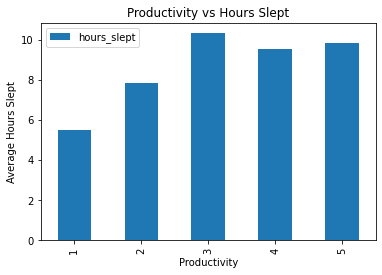

In [154]:
from matplotlib import pyplot as plt

prod_avg_per_hours_slept.plot(kind="bar")
plt.title("Productivity vs Hours Slept")
plt.xlabel("Productivity")
plt.ylabel("Average Hours Slept")

## Plotting Graph with pyecharts (should run local)

In [ ]:
!pip install pyecharts==1.7.1

In [ ]:
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType

productivity = prod_avg_per_hours_slept.index.values.tolist()
avg_hours_slept = prod_avg_per_hours_slept['hours_slept'].values.tolist()

bar = (
 Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK))
 .add_xaxis(productivity)
 .add_yaxis('Average Hours Slept', avg_hours_slept)
 .set_global_opts(title_opts=opts.TitleOpts(title='Productivity vs Hours Slept'))
)

bar.render()

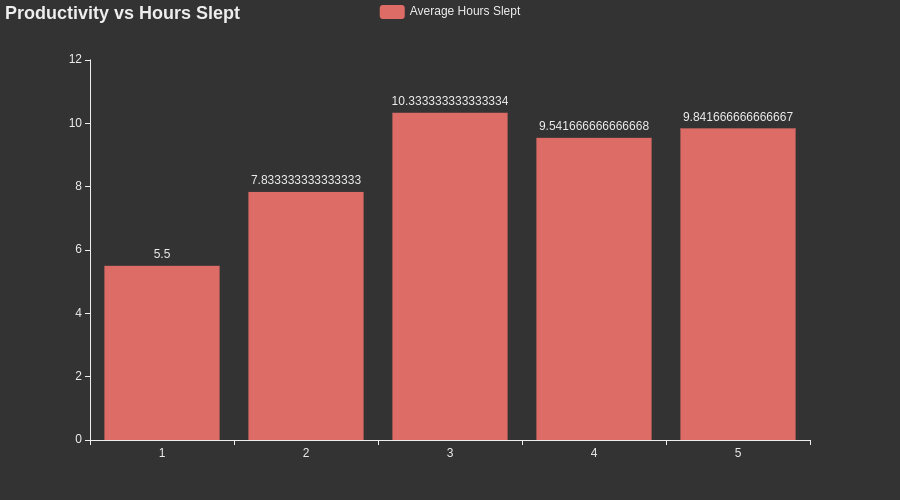